In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2 as cv
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense
from tensorflow.keras.layers import MaxPooling2D, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')
import random
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as  plt

In [2]:
#initial parameters
lr=1e-2  #learning rate
batch_size=32
epoch=25

In [3]:
#storing d= images from different folders to single list
images_data=[i for i in  glob.glob(r'gender_dataset/**/*'+"/**/*" , recursive=True) if not os.path.isdir(i)]
random.shuffle(images_data)


In [5]:
data=[]
labels=[]


In [6]:
# converting storing images into data list in a form of array and labelling them as man or women.

for i in images_data:
    image=cv.imread(i)
    image=cv.resize(image, (96,96))
    image=img_to_array(image)
    data.append(image)
    
    label = i.split(os.path.sep)[-2]
    if label == "women":
        label = 1
    else:
        label = 0

    labels.append([label])


In [7]:
classes=["Male" , "Female"]

In [8]:
data[0].shape

(96, 96, 3)

In [9]:
height, width ,channel = 96,96,3
input_shape=(height, width, channel)
input_shape

(96, 96, 3)

In [10]:
#converting data and label list into array
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [11]:
#spliting data into training and test
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.2,random_state=42)

In [12]:
#converting vertor into a binary matrix
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [13]:
#augmentation of data
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")   

In [14]:
# #model 
# model = Sequential()

# # CNN layers
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(height,width,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())

# # RNN layers
# model.add(tf.keras.layers.Reshape((1, -1)))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(2, activation='sigmoid'))


In [15]:
dim=-1
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=dim))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=dim))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=dim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=dim))

model.add(Conv2D(256, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=dim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("sigmoid"))

In [16]:
opt = Adam(learning_rate=lr )
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
# from tensorflow.keras.callbacks import ModelCheckpoint ,EarlyStopping
# es=EarlyStopping (monitor="val_accuracy" , min_delta=0.01 , patience=5 ,verbose=1)
# model_cp=ModelCheckpoint(filepath="best_model.keras" ,monitor="val_accuracy" ,save_best_only=True ,verbose=1)


In [18]:
#training of model
history= model.fit(aug.flow(x_train, y_train, batch_size=batch_size),validation_data=(x_test,y_test) ,epochs=epoch, verbose=1 , shuffle=False  )

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 92s 691ms/step - accuracy: 0.5853 - loss: 1.2392 - val_accuracy: 0.6290 - val_loss: 1.8075
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 690ms/step - accuracy: 0.6315 - loss: 0.8095 - val_accuracy: 0.5940 - val_loss: 4.8204
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 87s 696ms/step - accuracy: 0.6190 - loss: 0.7776 - val_accuracy: 0.6200 - val_loss: 0.9670
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 88s 702ms/step - accuracy: 0.6342 - loss: 0.7938 - val_accuracy: 0.7790 - val_loss: 0.5027
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 87s 692ms/step - accuracy: 0.6991 - loss: 0.6369 - val_accuracy: 0.6490 - val_loss: 0.6242
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 690ms/step - accuracy: 0.7369 - loss: 0.5817 - val_accuracy: 0.7050 - val_loss: 0.5888
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 87s 694ms/step - accuracy: 0.7744 - loss: 0.4859 - val_accuracy: 0.8230 - val_loss: 0.3795
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 684ms/step - accuracy: 0.8201 - loss: 0

In [19]:
#calculating model accuracy and loss score
loss, accuracy = model.evaluate(x_test , y_test)
print("Model Accuracy:", accuracy)
print("Model Loss:", loss)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9451 - loss: 0.1331
Model Accuracy: 0.9490000009536743
Model Loss: 0.13963446021080017


In [20]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

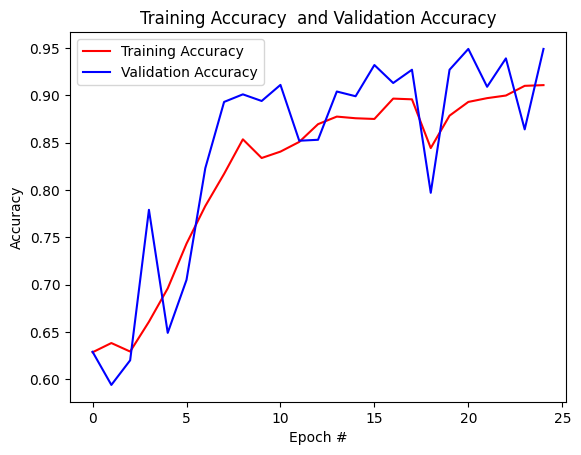

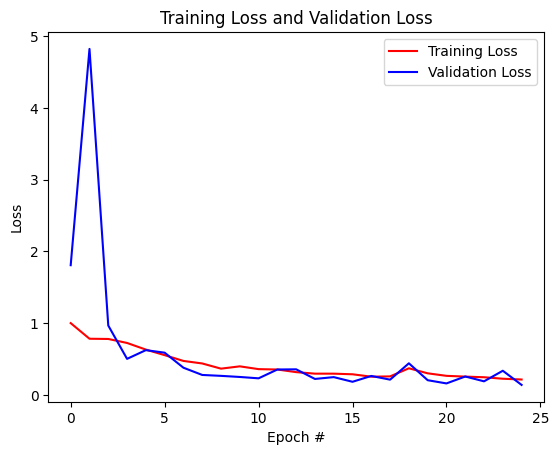

In [21]:
epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training Accuracy  and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
y_pred=model.predict(x_test)
y_pred_classes=[np.argmax(i) for i in y_pred]


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step


In [23]:
y_true=[np.argmax(i) for i in y_test]
target_names = ['Man', 'Women']
print(classification_report(y_true, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

         Man       0.95      0.95      0.95       511
       Women       0.95      0.94      0.95       489

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred_classes)
cm

array([[487,  24],
       [ 27, 462]], dtype=int64)

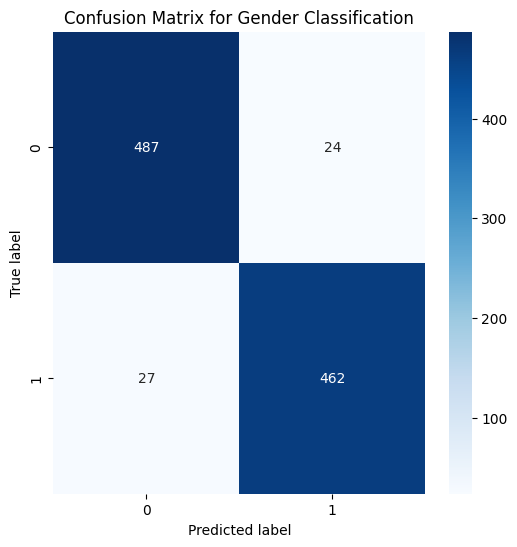

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gender Classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


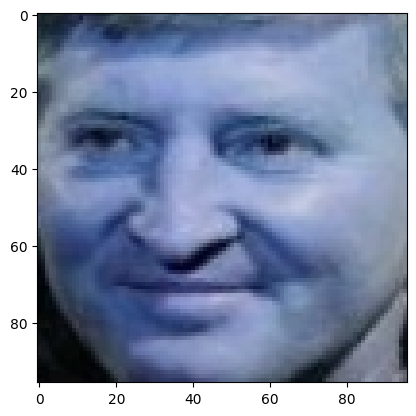

In [28]:
plt.imshow(x_test[10])

In [29]:
classes[y_pred_classes[10]]

'Male'

In [30]:
model.save('gender_model_25_32_2.keras')